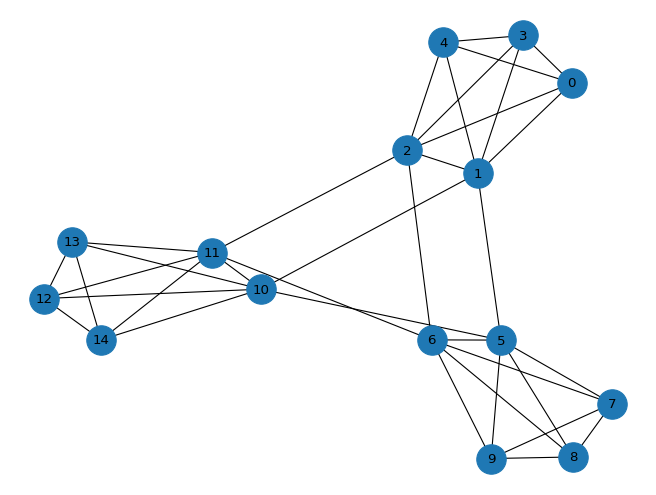

In [96]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#G = nx.Graph()
#G = nx.powerlaw_cluster_graph(n=10, m=2, p=0.1, seed=143)
G = nx.powerlaw_cluster_graph(n=10, m=2, p=0.1, seed=143)

#deg_tri = [[1,0],[1,0],[1,0],[2,0],[1,0],[2,1],[0,1],[0,1]]
#G = nx.random_clustered_graph(deg_tri)
#G = nx.Graph(G)
#G.remove_edges_from(G.selfloop_edges())
#G.add_edge(1,2)  # default edge data=1

#G = nx.generators.bipartite.bipartite_random_graph(5,5, 0.1,seed=10)
#G = nx.bipartite.generators.random_graph(5,15,0.8, seed=10)

#G = nx.karate_club_graph()
#G = nx.davis_southern_women_graph()
#G = nx.house_x_graph()
#G = nx.florentine_families_graph()
#G = nx.complete_bipartite_graph(5, 10)

# Tractable small graph
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sub1 = nx.complete_graph(5)
sub2 = nx.complete_graph(5)
sub3 = nx.complete_graph(5)
G_barbell = nx.disjoint_union(sub1, sub2)
G_barbell = nx.disjoint_union(G_barbell, sub3)
G_barbell.add_edge(1,5)
G_barbell.add_edge(2,6)
G_barbell.add_edge(1,10)
G_barbell.add_edge(2,11)
G_barbell.add_edge(5,10)
G_barbell.add_edge(6,11)
nx.draw(G_barbell, with_labels=True, node_size=700)
plt.show()

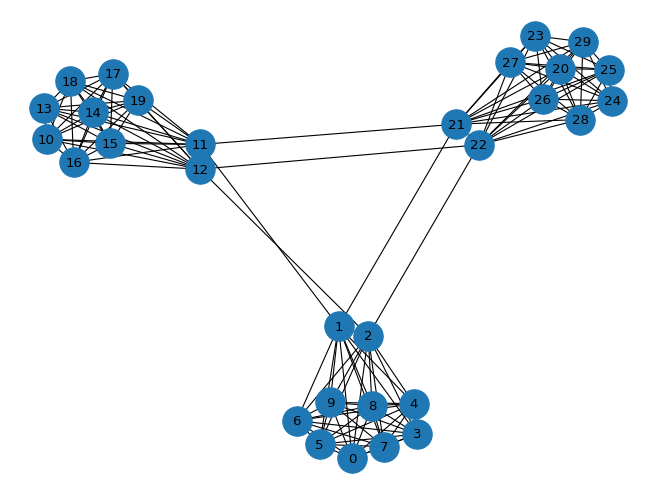

In [103]:
# actual graph example for paper
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

n_nodes = 10
sub1 = nx.complete_graph(n_nodes)
sub2 = nx.complete_graph(n_nodes)
sub3 = nx.complete_graph(n_nodes)
G_barbell = nx.disjoint_union(sub1, sub2)
G_barbell = nx.disjoint_union(G_barbell, sub3)
# 1 to 2 
G_barbell.add_edge(1,n_nodes+1)
G_barbell.add_edge(2,n_nodes+2)
# 2 to 3
G_barbell.add_edge(n_nodes+1, 2*n_nodes+1)
G_barbell.add_edge(n_nodes+2, 2*n_nodes+2)
# 3 to 1
G_barbell.add_edge(2*n_nodes+1,1)
G_barbell.add_edge(2*n_nodes+2,2)
nx.draw(G_barbell, with_labels=True, node_size=700)
plt.show()

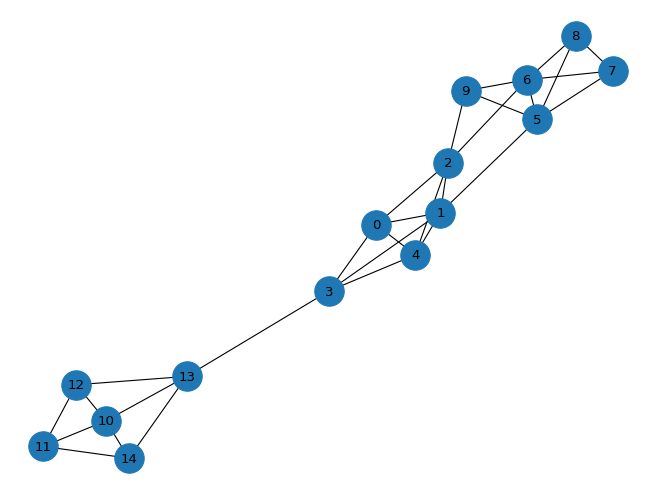

In [94]:
# IGNORE
# small for debug : case 2, ignore for now
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

sub1 = nx.complete_graph(10)
sub2 = nx.complete_graph(10)
sub3 = nx.complete_graph(10)
G_barbell = nx.disjoint_union(sub1, sub2)
G_barbell = nx.disjoint_union(G_barbell, sub3)

G_barbell.add_edge(1,5)

G_barbell.remove_edge(1,5)

nx.draw(G_sad_barbell, with_labels=True, node_size=700)
plt.show()

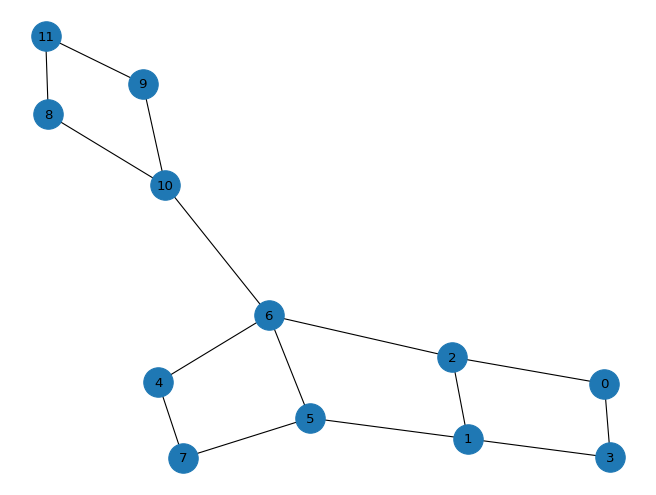

In [99]:
# small
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sub1 = nx.bipartite.generators.random_graph(2,2,0.9, seed=10)
sub2 = nx.bipartite.generators.random_graph(2,2,0.9, seed=10)
sub3 = nx.bipartite.generators.random_graph(2,2,0.9, seed=10)
G_bipart = nx.disjoint_union(sub1, sub2)
G_bipart = nx.disjoint_union(G_bipart, sub3)
G_bipart.add_edge(1,5)
G_bipart.add_edge(2,6)
G_bipart.add_edge(6,10)
nx.draw(G_bipart, with_labels=True, node_size=700)
plt.show()

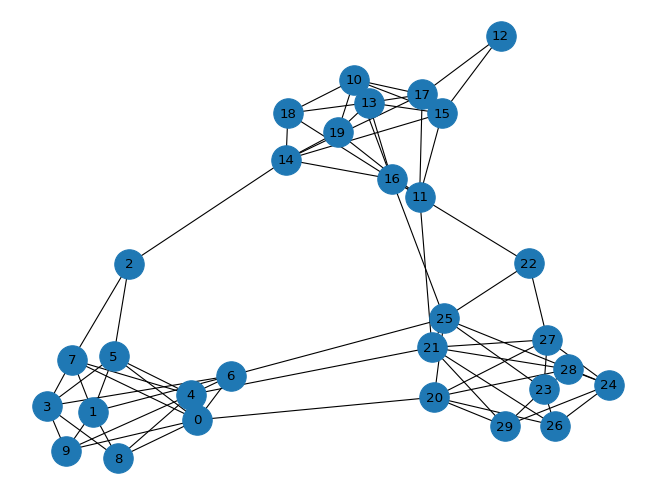

In [122]:
# actual for paper, n = 30
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

p_connect = 0.9
n_part = 5

sub1 = nx.bipartite.generators.random_graph(n_part, n_part, p_connect, seed=10)
sub2 = nx.bipartite.generators.random_graph(n_part, n_part, p_connect, seed=10)
sub3 = nx.bipartite.generators.random_graph(n_part, n_part, p_connect, seed=10)
G_bipart = nx.disjoint_union(sub1, sub2)
G_bipart = nx.disjoint_union(G_bipart, sub3)
# sparse connections
n_nodes = 2 * n_part

# connect subgraph 1 to 2
a, b = np.random.randint(n_nodes), np.random.randint(n_nodes, n_nodes*2)

# connect subgraph 2 to 3
# (10,20), (20,30)
c, d = np.random.randint(n_nodes,n_nodes*2), np.random.randint(n_nodes*2, n_nodes*3)
e, f = np.random.randint(n_nodes,n_nodes*2), np.random.randint(n_nodes*2, n_nodes*3)
g, h = np.random.randint(n_nodes,n_nodes*2), np.random.randint(n_nodes*2, n_nodes*3)

# connect subgraph 1 to 3
i, j = np.random.randint(n_nodes), np.random.randint(n_nodes*2, n_nodes*3)
k, l = np.random.randint(n_nodes), np.random.randint(n_nodes*2, n_nodes*3)
m, n = np.random.randint(n_nodes), np.random.randint(n_nodes*2, n_nodes*3)

G_bipart.add_edges_from([(a,b), (c, d), (e,f), (g, h), (i, j), (k, l), (m, n)])
#print([(a,b), (c, d), (e,f), (g, h), (i, j), (k, l), (m, n)])
#print(G_bipart.edges())

nx.draw(G_bipart, with_labels=True, node_size=700)
plt.show()

In [123]:
dict_g = nx.to_dict_of_dicts(G_bipart)
print(dict_g)
G2 = nx.from_dict_of_dicts(dict_g)

{0: {5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 20: {}}, 1: {5: {}, 6: {}, 7: {}, 8: {}, 9: {}}, 2: {5: {}, 7: {}, 14: {}}, 3: {5: {}, 6: {}, 7: {}, 8: {}, 9: {}}, 4: {5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 21: {}}, 5: {0: {}, 1: {}, 2: {}, 3: {}, 4: {}}, 6: {0: {}, 1: {}, 3: {}, 4: {}, 25: {}}, 7: {0: {}, 1: {}, 2: {}, 3: {}, 4: {}}, 8: {0: {}, 1: {}, 3: {}, 4: {}}, 9: {0: {}, 1: {}, 3: {}, 4: {}}, 10: {15: {}, 16: {}, 17: {}, 18: {}, 19: {}}, 11: {15: {}, 16: {}, 17: {}, 18: {}, 19: {}, 22: {}, 21: {}}, 12: {15: {}, 17: {}}, 13: {15: {}, 16: {}, 17: {}, 18: {}, 19: {}}, 14: {15: {}, 16: {}, 17: {}, 18: {}, 19: {}, 2: {}}, 15: {10: {}, 11: {}, 12: {}, 13: {}, 14: {}}, 16: {10: {}, 11: {}, 13: {}, 14: {}, 25: {}}, 17: {10: {}, 11: {}, 12: {}, 13: {}, 14: {}}, 18: {10: {}, 11: {}, 13: {}, 14: {}}, 19: {10: {}, 11: {}, 13: {}, 14: {}}, 20: {25: {}, 26: {}, 27: {}, 28: {}, 29: {}, 0: {}}, 21: {25: {}, 26: {}, 27: {}, 28: {}, 29: {}, 11: {}, 4: {}}, 22: {25: {}, 27: {}, 11: {}}, 23: {25: {}, 26: {}, 2

In [26]:
print(np.random.random())
        
for v in G.nodes():
    #assign_credit(v)
    G.nodes[v]['creditw'] = False
    G.nodes[v]['recommender'] = None
    G.nodes[v]['round_visited'] = None
    if np.random.random() > 0.6:
        G.nodes[v]['creditw'] = True

#def assign_credit(v):
    
        
print(G.nodes(data=True))
colors = [G.nodes[n]['creditw'] for n in G.nodes]
#print(colors)
print(G.nodes)

0.46569459431207005
[('Evelyn Jefferson', {'bipartite': 0, 'creditw': True, 'recommender': None, 'round_visited': None}), ('Laura Mandeville', {'bipartite': 0, 'creditw': True, 'recommender': None, 'round_visited': None}), ('Theresa Anderson', {'bipartite': 0, 'creditw': False, 'recommender': None, 'round_visited': None}), ('Brenda Rogers', {'bipartite': 0, 'creditw': False, 'recommender': None, 'round_visited': None}), ('Charlotte McDowd', {'bipartite': 0, 'creditw': True, 'recommender': None, 'round_visited': None}), ('Frances Anderson', {'bipartite': 0, 'creditw': True, 'recommender': None, 'round_visited': None}), ('Eleanor Nye', {'bipartite': 0, 'creditw': True, 'recommender': None, 'round_visited': None}), ('Pearl Oglethorpe', {'bipartite': 0, 'creditw': True, 'recommender': None, 'round_visited': None}), ('Ruth DeSand', {'bipartite': 0, 'creditw': False, 'recommender': None, 'round_visited': None}), ('Verne Sanderson', {'bipartite': 0, 'creditw': True, 'recommender': None, 'roun

10
True
[0, 1, 3, 4, 5, 9]


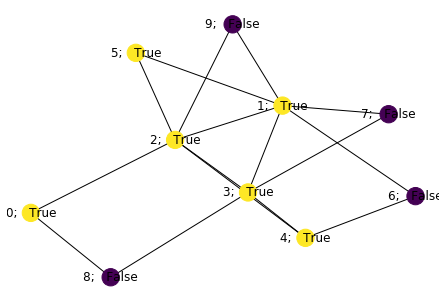

In [14]:
labels = {n: str(n) + ';   ' + \
          str(G.nodes[n]['creditw']) for n in G.nodes}

#val_map = {n: G.nodes[n]['creditw'] for n in G.nodes}
# values = [val_map.get(node, 0.25) for node in G.nodes()]

nx.draw(G, with_labels=True, labels=labels, node_color=colors)
print(G.number_of_nodes())
print(G.nodes[2]['creditw'])
print(list(G.neighbors(2)))

In [49]:
rec_start = set([2,3])
currently_checking = rec_start
#for i in rec_start:
    #current_rec_list.append(G.nodes[i])
visited_list = set([])
round_num = 0
next_round = set([])

while len(visited_list) < G.number_of_nodes():
    round_num += 1 
    print('round num, visitied list', round_num, visited_list)
    
    for i in currently_checking:
        visited_list.add(i)
        G.nodes[i]['round_visited'] = round_num
        for neigh in G.neighbors(i): 
            if G.nodes[neigh]['creditw'] == True and G.nodes[neigh]['round_visited'] is None: # not visited yet
                #print('they were credit worth, check next round')
                next_round.add(neigh)
            else:
                pass # recommender lied :(
    if len(next_round) == 0:
        print('We hit a dead end :( ')
        break
    print('just checked, ', currently_checking)
    print('next checked, ', next_round )
    currently_checking = next_round
    next_round = set([])
        
print('Done, round numbs = ', round_num)
print('% Nodes visited', len(visited_list) / G.number_of_nodes())



round num, visitied list 1 set()
We hit a dead end :( 
Done, round numbs =  1
% Nodes visited 0.2


[(0, {'creditw': True, 'recommender': None, 'round_visited': 2, 'round_visit': 5526}), (1, {'creditw': True, 'recommender': None, 'round_visited': 2, 'round_visit': 5526}), (2, {'creditw': True, 'recommender': None, 'round_visited': 1, 'round_visit': 5526}), (3, {'creditw': True, 'recommender': None, 'round_visited': 1, 'round_visit': 5526}), (4, {'creditw': True, 'recommender': None, 'round_visited': 3, 'round_visit': 5526}), (5, {'creditw': True, 'recommender': None, 'round_visited': 3, 'round_visit': 5526}), (6, {'creditw': False, 'recommender': None, 'round_visited': None}), (7, {'creditw': False, 'recommender': None, 'round_visited': None, 'round_visit': 4}), (8, {'creditw': False, 'recommender': None, 'round_visited': None}), (9, {'creditw': False, 'recommender': None, 'round_visited': None, 'round_visit': 2})]


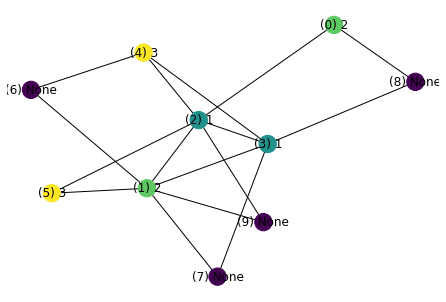

In [51]:
print(G.nodes(data=True))
colors = []
# TODO : color correctly by round
#colors = [G.nodes[n]['round_visited'] for n in G.nodes]
labels = {n: '(' + str(n) + ') '  + \
          str(G.nodes[n]['round_visited']) for n in G.nodes}

for n in G.nodes:
    if G.nodes[n]['round_visited'] != None:
        colors.append(G.nodes[n]['round_visited'])
    else:
        colors.append(-1)

#print(colors)
#plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True, labels=labels, node_color=colors, cmap=plt.get_cmap('viridis'))
plt.show()

In [ ]:
colors = [G.nodes[n]['visited1'] for n in G.nodes]
nx.draw(G, with_labels=True, labels=labels, node_color=colors)

In [125]:
nx.to_dict_of_lists(G)

{0: [2, 8],
 1: [2, 3, 5, 6, 7, 9],
 2: [0, 1, 3, 4, 5, 9],
 3: [1, 2, 4, 7, 8],
 4: [2, 3, 6],
 5: [1, 2],
 6: [1, 4],
 7: [1, 3],
 8: [0, 3],
 9: [1, 2]}